In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2005-2006
VITAEC_D = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/VITAEC_D.XPT')
# read NHANES data: Dual Energy X-ray Absorptiometry - Spine 2005-2006
DXXSPN_D = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/DXXSPN_D.XPT')
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2017-2018
VITAEC_J = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/VITAEC_J.XPT')
# read NHANES data: Dual Energy X-ray Absorptiometry - Spine 2017-2018
DXXSPN_J = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/DXXSPN_J.XPT')

# Demographics D: DEMO_D.XPT
DEMO_D = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/DEMO_D.XPT')

# Demographics J
DEMO_J = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/DEMO_J.XPT')

#body measures D
BMX_D = pd.read_sas('/content/drive/MyDrive/Capstone/Raw Data/BMX_D.XPT')

Mounted at /content/drive


In [ ]:
# alpha- and gamma-tocopherol LBXVIE and LBDGTCSI from VITAEC_D
# lumbar spin BMD - DXXLSA from
# race/ethnicity, gender, age, PIR (poverty income ratio), body mass index (BMI), serum phosphorus, and serum calcium

print(VITAEC_D.shape)
print(DXXSPN_D.shape)
VITAEC_D
# merge vitamin table with spine_exam table
df_joined_1 = pd.merge(VITAEC_D, DXXSPN_D, on = 'SEQN')
print(df_joined_1.shape)


print("---------------------")
print(DXXSPN_D.shape)
print(VITAEC_J.shape)
print(DXXSPN_J.shape)
# merge vitamin table with spine_exam table
df_joined_2 = pd.merge(VITAEC_J, DXXSPN_J, on = 'SEQN')
print(df_joined_2.shape)
#df_joined = pd.concat([df_joined_1, df_joined_2])



(8086, 25)
(7720, 35)
(7720, 59)
---------------------
(7720, 35)
(7435, 40)
(2898, 24)
(2898, 63)


In [ ]:
df = pd.merge(pd.merge(VITAEC_D,DXXSPN_D,on='SEQN'),DEMO_D,on='SEQN')
df = pd.merge(df, BMX_D, on='SEQN')

In [ ]:
df.head()
df.dropna(subset=['LBDVIESI','LBDGTCSI','DXXOSBMD'], inplace=True)
df.shape

(5361, 127)

In [ ]:
#keep only 8-19
def age_replace(x):
    if x >=8 and x <= 19:
        return '8-19'
    else:
        return 'else'
df['age_group'] = df['RIDAGEYR'].apply(age_replace)
filtered_data = df[df["age_group"] == '8-19']

In [ ]:
#get avg value for bmi
print(df['DXXOSBMD'].describe())
bmd_median = df['DXXOSBMD'].median()
bmd_first_q = df['DXXOSBMD'].describe()[4]
bmd_thrid_q = df['DXXOSBMD'].describe()[6]


count    5361.000000
mean        0.970641
std         0.192124
min         0.371000
25%         0.859000
50%         0.988000
75%         1.101000
max         1.706000
Name: DXXOSBMD, dtype: float64


In [ ]:
#some feature cleaning
bmd_median = filtered_data['DXXOSBMD'].median()
bmd_first_q = filtered_data['DXXOSBMD'].describe()[4]
bmd_thrid_q = filtered_data['DXXOSBMD'].describe()[6]

def bmi_split(x):
    if x < bmd_first_q:
        return 'first_q'
    elif x < bmd_median:
        return 'second_q'
    elif x < bmd_thrid_q:
        return 'thrid_q'
    else:
        return 'fourth_q'
filtered_data['bmd_quartiles'] = filtered_data['DXXOSBMD'].apply(bmi_split)



def gender_replace(x):
    if x == 1.0:
        return 'male'
    else:
        return 'female'
filtered_data['gender'] = filtered_data['RIAGENDR'].apply(gender_replace)




print(filtered_data['LBDGTCSI'].describe())
alpha_median = filtered_data['LBDGTCSI'].median()
alpha_first_q = filtered_data['LBDGTCSI'].describe()[4]
alpha_thrid_q = filtered_data['LBDGTCSI'].describe()[6]

def alpha_split(x):
    if x < alpha_first_q:
        return 'first_q'
    elif x < alpha_median:
        return 'second_q'
    elif x < alpha_thrid_q:
        return 'thrid_q'
    else:
        return 'fourth_q'
filtered_data['alpha_quartiles'] = filtered_data['LBDGTCSI'].apply(alpha_split)

def race_split(x):
    if x == 1:
        return 'Mexican American'
    elif x == 2:
        return 'Other Hispanic'
    elif x == 3:
        return 'Non-Hispanic White'
    elif x == 4:
        return 'Non-Hispanic Black'
    else:
      return 'Other Race - Including Multi-Racial'
filtered_data['race'] = filtered_data['RIDRETH1'].apply(race_split)


count    2249.000000
mean        4.826100
std         1.881881
min         0.793000
25%         3.507000
50%         4.564000
75%         5.861000
max        18.183000
Name: LBDGTCSI, dtype: float64


<ipython-input-7-6160d4d30e57>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bmd_quartiles'] = filtered_data['DXXOSBMD'].apply(bmi_split)
<ipython-input-7-6160d4d30e57>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['gender'] = filtered_data['RIAGENDR'].apply(gender_replace)
<ipython-input-7-6160d4d30e57>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
#split data by alpha quartile--q1
print('INFO of Quartile 1', '\n')
df_1 = filtered_data[filtered_data["alpha_quartiles"] == 'first_q']
print('Number of subjects: ', df_1.shape[0], '\n')
print('GENDER BREAKDOWN:\n')
print(df_1['gender'].value_counts()/df_1.shape[0]* 100, '\n')
print('Age', round(df_1['RIDAGEYR'].mean(),4), "+-", round(df_1['RIDAGEYR'].std(),4),'\n')
print('RACE BREAKDOWN:\n')
print(df_1['race'].value_counts() / df_1.shape[0] * 100, '\n')
print('BMI:', round(df_1['BMXBMI'].mean(),4), "+-", round(df_1['BMXBMI'].std(),4),'\n')
print('PIR:', round(df_1['INDFMPIR'].mean(),4), "+-", round(df_1['INDFMPIR'].std(),4),'\n')
print('BMD:', round(df_1['DXXOSBMD'].mean(),4),'+-',round(df_1['DXXOSBMD'].std(),4),'\n')

INFO of Quartile 1 

Number of subjects:  560 

GENDER BREAKDOWN:

male      57.857143
female    42.142857
Name: gender, dtype: float64 

Age 13.9268 +- 3.1741 

RACE BREAKDOWN

Mexican American                       34.285714
Non-Hispanic White                     30.357143
Non-Hispanic Black                     25.535714
Other Race - Including Multi-Racial     6.607143
Other Hispanic                          3.214286
Name: race, dtype: float64 

BMI: 21.2907 +- 4.826 

PIR: 2.4878 +- 1.6196 

BMD: 0.8606 +- 0.1977 



In [ ]:
#split data by alpha quartile--q2
print('INFO of Quartile 2', '\n')
df_1 = filtered_data[filtered_data["alpha_quartiles"] == 'second_q']
print('Number of subjects: ', df_1.shape[0], '\n')
print('GENDER BREAKDOWN:\n')
print(df_1['gender'].value_counts()/df_1.shape[0]* 100, '\n')
print('Age', round(df_1['RIDAGEYR'].mean(),4), "+-", round(df_1['RIDAGEYR'].std(),4),'\n')
print('RACE BREAKDOWN:\n')
print(df_1['race'].value_counts() / df_1.shape[0] * 100, '\n')
print('BMI: ', round(df_1['BMXBMI'].mean(),4), "+-", round(df_1['BMXBMI'].std(),4),'\n')
print('PIR: ', round(df_1['INDFMPIR'].mean(),4), "+-", round(df_1['INDFMPIR'].std(),4),'\n')
print('BMD', round(df_1['DXXOSBMD'].mean(),4),'+-',round(df_1['DXXOSBMD'].std(),4),'\n')

INFO of Quartile 2 

Number of subjects:  555 

GENDER BREAKDOWN:

male      56.036036
female    43.963964
Name: gender, dtype: float64 

Age 13.8739 +- 3.2515 

RACE BREAKDOWN:

Non-Hispanic Black                     34.594595
Non-Hispanic White                     29.369369
Mexican American                       28.828829
Other Race - Including Multi-Racial     4.864865
Other Hispanic                          2.342342
Name: race, dtype: float64 

BMI:  22.0669 +- 5.1954 

PIR:  2.1933 +- 1.5588 

BMD 0.8734 +- 0.1994 



In [ ]:
#split data by alpha quartile--q3
print('INFO of Quartile 3', '\n')
df_1 = filtered_data[filtered_data["alpha_quartiles"] == 'thrid_q']
print('Number of subjects: ', df_1.shape[0], '\n')
print('GENDER BREAKDOWN:\n')
print(df_1['gender'].value_counts()/df_1.shape[0]* 100, '\n')
print('Age', round(df_1['RIDAGEYR'].mean(),4), "+-", round(df_1['RIDAGEYR'].std(),4),'\n')
print('RACE BREAKDOWN:\n')
print(df_1['race'].value_counts() / df_1.shape[0] * 100, '\n')
print('BMI:', round(df_1['BMXBMI'].mean(),4), "+-", round(df_1['BMXBMI'].std(),4),'\n')
print('PIR:', round(df_1['INDFMPIR'].mean(),4), "+-", round(df_1['INDFMPIR'].std(),4),'\n')
print('BMD:', round(df_1['DXXOSBMD'].mean(),4),'+-',round(df_1['DXXOSBMD'].std(),4),'\n')

INFO of Quartile 3 

Number of subjects:  569 

GENDER BREAKDOWN:

female    52.54833
male      47.45167
Name: gender, dtype: float64 

Age 14.051 +- 3.3 

RACE BREAKDOWN:

Non-Hispanic Black                     35.852373
Mexican American                       31.810193
Non-Hispanic White                     22.847100
Other Race - Including Multi-Racial     6.502636
Other Hispanic                          2.987698
Name: race, dtype: float64 

BMI:  23.0804 +- 5.8173 

PIR:  2.0127 +- 1.4177 

BMD 0.8848 +- 0.1965 



In [ ]:
#split data by alpha quartile--q4
print('INFO of Quartile 4', '\n')
df_1 = filtered_data[filtered_data["alpha_quartiles"] == 'fourth_q']
print('Number of subjects:', df_1.shape[0], '\n')
print('GENDER BREAKDOWN:\n')
print(df_1['gender'].value_counts()/df_1.shape[0]* 100, '\n')
print('Age:', round(df_1['RIDAGEYR'].mean(),4), "+-", round(df_1['RIDAGEYR'].std(),4),'\n')
print('RACE BREAKDOWN:\n')
print(df_1['race'].value_counts() / df_1.shape[0] * 100, '\n')
print('BMI:', round(df_1['BMXBMI'].mean(),4), "+-", round(df_1['BMXBMI'].std(),4),'\n')
print('PIR:', round(df_1['INDFMPIR'].mean(),4), "+-", round(df_1['INDFMPIR'].std(),4),'\n')
print('BMD:', round(df_1['DXXOSBMD'].mean(),4),'+-',round(df_1['DXXOSBMD'].std(),4),'\n')

INFO of Quartile 4 

Number of subjects: 565 

GENDER BREAKDOWN:

female    53.274336
male      46.725664
Name: gender, dtype: float64 

Age: 13.7965 +- 3.3921 

RACE BREAKDOWN:

Mexican American                       37.876106
Non-Hispanic Black                     34.867257
Non-Hispanic White                     20.353982
Other Race - Including Multi-Racial     3.716814
Other Hispanic                          3.185841
Name: race, dtype: float64 

BMI: 25.2292 +- 6.8564 

PIR: 1.9306 +- 1.4253 

BMD: 0.876 +- 0.2058 



male 1169
female 1080


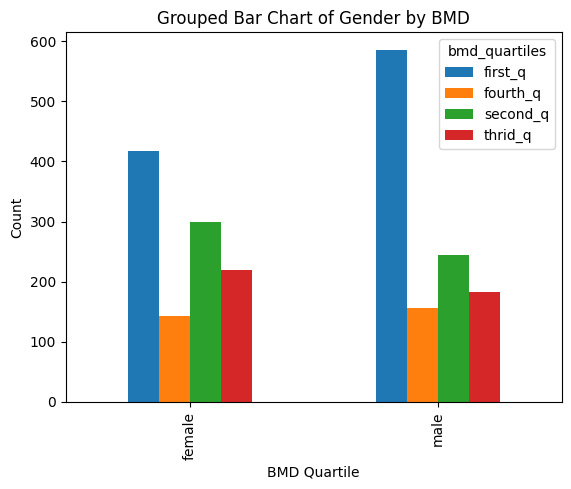

In [ ]:
#RIAGENDR - Gender
print('male', (filtered_data['RIAGENDR'] == 1.0).sum())
print('female',(filtered_data['RIAGENDR'] == 2.0).sum())

import matplotlib.pyplot as plt

# Pivot the data to create a grouped bar chart
pivot_data = filtered_data.pivot_table(index='gender', columns='bmd_quartiles', aggfunc='size', fill_value=0)

# Create a grouped bar chart
pivot_data.plot(kind='bar', stacked=False)

# Add labels and a title
plt.xlabel("BMD Quartile")
plt.ylabel("Count")
plt.title("Grouped Bar Chart of Gender by BMD")

# Display the chart
plt.show()





In [ ]:
filtered_data['LBXVIE'].describe()

count    2249.000000
mean      784.644731
std       192.298893
min       322.000000
25%       659.000000
50%       757.000000
75%       874.000000
max      2850.000000
Name: LBXVIE, dtype: float64

else    3112
8-19    2249
Name: age_group, dtype: int64